In [46]:
import matplotlib as mpl
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature




A notebook to test setting map extent and boundary.

Currently, can limi

In [41]:
lat = np.linspace(40., 90., 101)
lon = np.linspace(-180., 180., 720)

lon2d, lat2d = np.meshgrid(lon, lat)
z = np.sin(np.radians(lat2d))**2 + np.cos(np.radians(lon2d))**2
z = np.where((z < 1.) | (z > 1.5), z, np.nan)

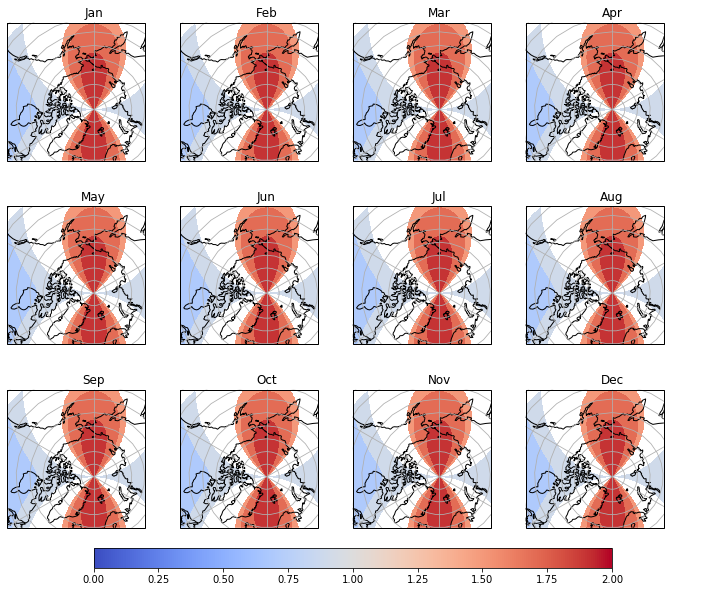

In [83]:
cmap = plt.get_cmap('coolwarm')
norm = mpl.colors.Normalize(vmin=0., vmax=2.)

square = mpath.Path([[0.,1.],[0.8,1.],[0.8,0.2],[0.,0.2]])

fig = plt.figure(figsize=[12, 9])

ax = []
monthstr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i, mstr in enumerate(monthstr):
    
    ax.append(plt.subplot(3, 4, i+1, projection=ccrs.NorthPolarStereo()))
    ax[i].set_extent([-180.,180.,50.,90.], ccrs.PlateCarree())
    
    cont = ax[i].contourf(lon, lat, z, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
    
    ax[i].gridlines()
    ax[i].coastlines()
    ax[i].set_title(mstr)
    
    ax[i].set_boundary(square, use_as_clip_path=True, transform=ax[i].transAxes)

    patch = mpatches.PathPatch(square, facecolor='none', transform=ax[i].transAxes)
    ax[i].add_patch(patch)
    for c in cont.collections:
        c.set_clip_path(patch)
        
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.05, top=0.9, hspace=0., wspace=0.)

axc = fig.add_axes([0.2, 0.05, 0.6, 0.03])
cbar = mpl.colorbar.ColorbarBase(axc, orientation='horizontal', norm=norm, cmap=cmap)

plt.show()


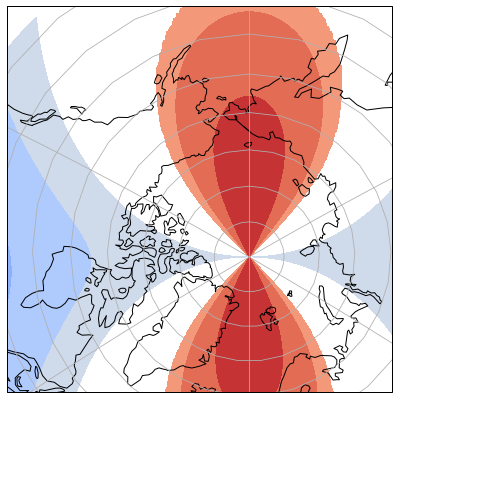

In [84]:
fig = plt.figure(figsize=(7,7))
ax = plt.subplot(projection=ccrs.Stereographic(central_longitude=0., central_latitude=80.))

ax.set_extent([-180.,180.,50.,90.], ccrs.PlateCarree())

cont = ax.contourf(lon, lat, z, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

ax.gridlines()
ax.coastlines()

square = mpath.Path([[0.,1.],[0.8,1.],[0.8,0.2],[0.,0.2]])
patch = mpatches.PathPatch(square, facecolor='none', transform=ax.transAxes)

ax.set_boundary(square, transform=ax.transAxes)
ax.add_patch(patch)
for c in cont.collections:
    c.set_clip_path(patch)
    
plt.tight_layout()
plt.show()

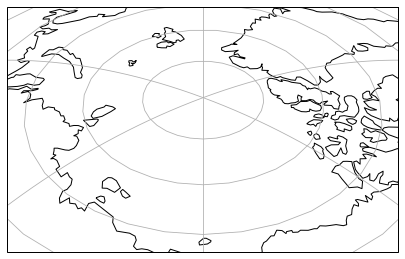

In [102]:
fig = plt.figure(figsize=(7,7))
ax = plt.subplot(projection=ccrs.Orthographic(central_longitude=-180., central_latitude=40.))
ax.set_extent([-160., 180., 70., 90.], ccrs.PlateCarree())

ax.coastlines()
ax.gridlines()
plt.show()